In [2]:
import plots
import prepare_data
import voronoi_analysis
import numpy as np
import matplotlib.pyplot as plt

In [78]:
import importlib
importlib.reload(voronoi_analysis)
importlib.reload(plots)

<module 'plots' from 'c:\\Users\\Magda\\Documents\\GitHub\\solution_pipes_patterns\\plots.py'>

In [77]:
data_path="new_data/_DEVONSHIRE_BAY_WEST.dat"
data_path_random="new_data/random_DEVONSHIRE_BAY_WEST.dat"
area_limit=14

In [79]:
df = prepare_data.read_data(data_path, preprocessed=True)
df_random= prepare_data.read_data(data_path_random, preprocessed=True)

voronoi_analyser = voronoi_analysis.VoronoiAnalyser(df)
voronoi_plotter = plots.Voronoi_Plotter(df)

voronoi_analyser_random = voronoi_analysis.VoronoiAnalyser(df_random)
voronoi_plotter_random = plots.Voronoi_Plotter(df_random)

BaseVoronoi initialized
BaseVoronoi initialized
BaseVoronoi initialized
BaseVoronoi initialized


In [ ]:
voronoi_plotter.all_voronoi_diagram()
voronoi_plotter_random.all_voronoi_diagram()

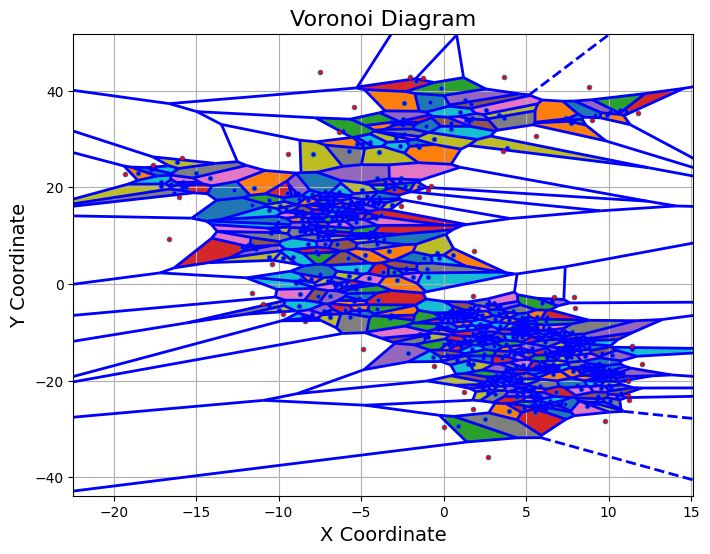

In [80]:
voronoi_plotter.all_voronoi_diagram_area_filtered(area_limit)

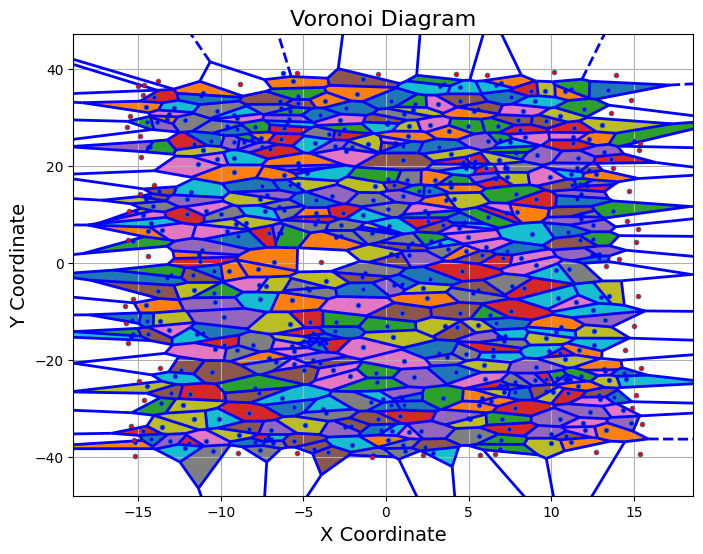

In [81]:
voronoi_plotter_random.all_voronoi_diagram_area_filtered(area_limit)

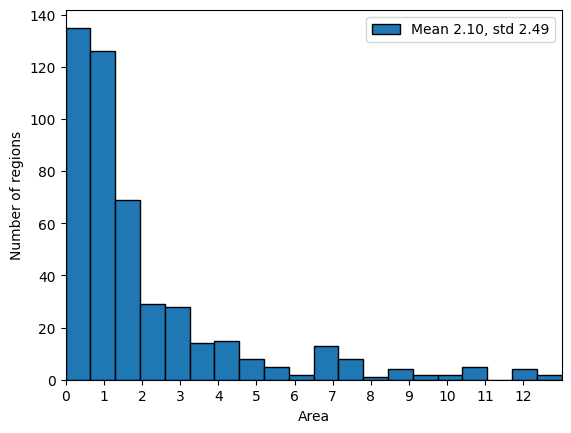

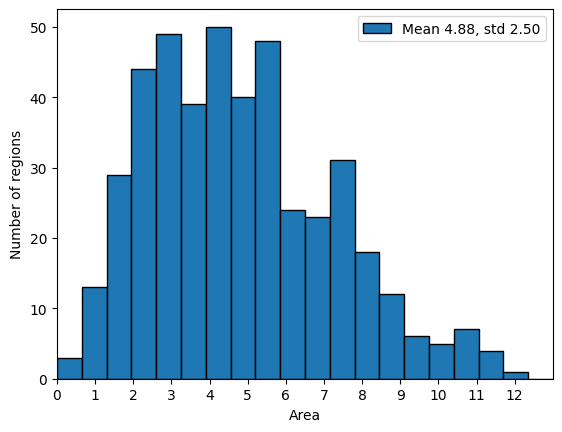

In [26]:
areas = df.loc[df["Point of Voronoi"] == 1, "Area"]
voronoi_plotter.areas_hist(areas)

areas_random = df_random.loc[df_random["Point of Voronoi"] == 1, "Area"]
voronoi_plotter.areas_hist(areas_random)

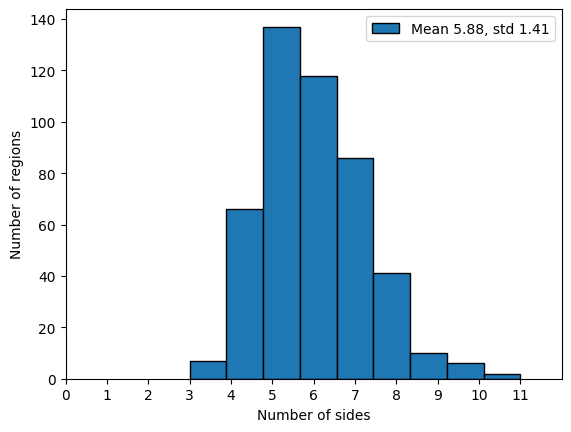

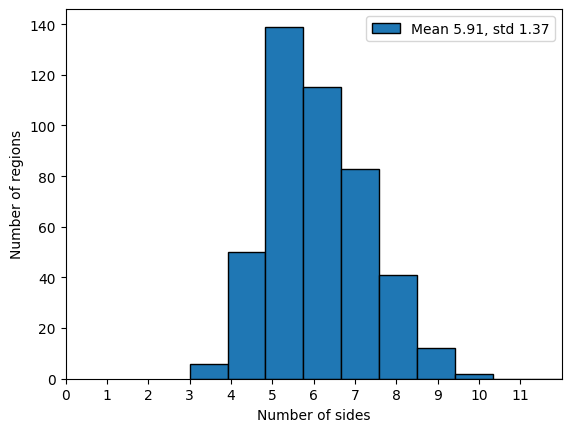

In [27]:
sides=voronoi_analyser.calculate_sides()
voronoi_plotter.sides_number_hist(sides)

sides_random=voronoi_analyser_random.calculate_sides()
voronoi_plotter.sides_number_hist(sides_random)

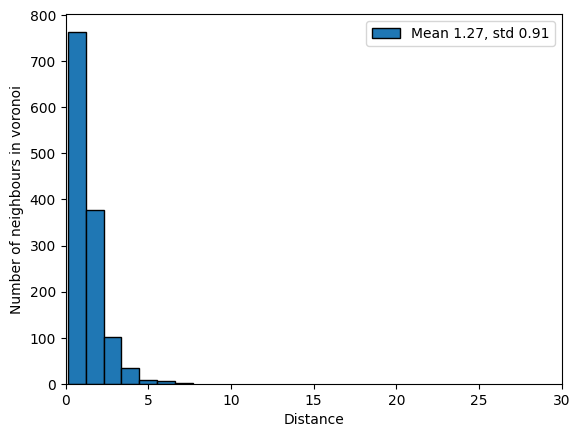

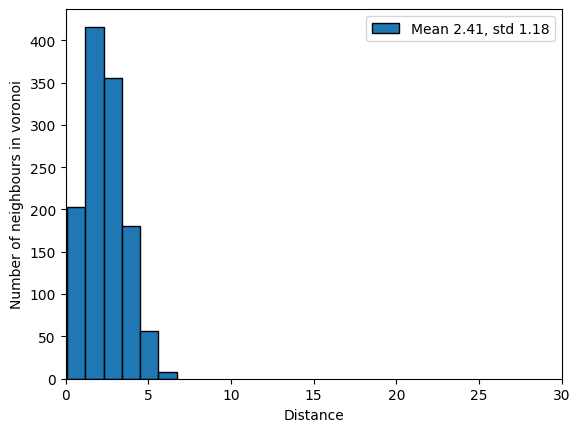

In [28]:
distances=voronoi_analyser.calculate_distance_between_neighbours()
voronoi_plotter.distance_between_neighbours_hist(distances)

distances_random=voronoi_analyser_random.calculate_distance_between_neighbours()
voronoi_plotter.distance_between_neighbours_hist(distances_random)

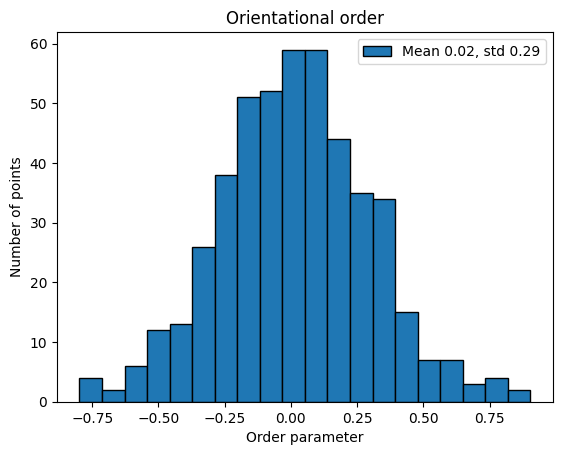

In [38]:
updated_df = voronoi_analyser.calculate_orientational_order(absolute = False)
order=updated_df.loc[df['Point of Voronoi']==1, 'Hexatic order']
voronoi_plotter.order_hist(order)

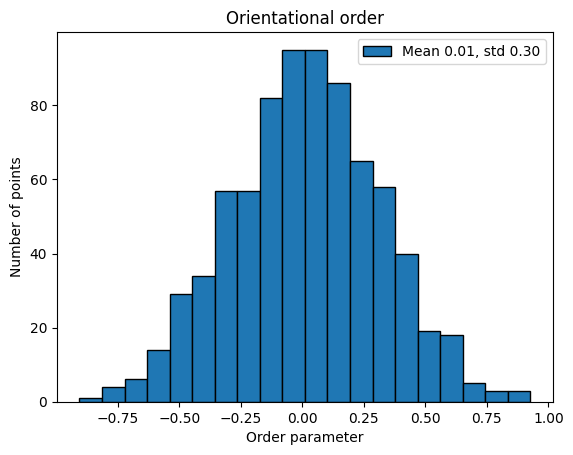

In [16]:
updated_df_random = voronoi_analyser_random.calculate_orientational_order(absolute = False)
order_random=updated_df_random.loc[df_random['Point of Voronoi']==1, 'Hexatic order']
voronoi_plotter.order_hist(order_random)

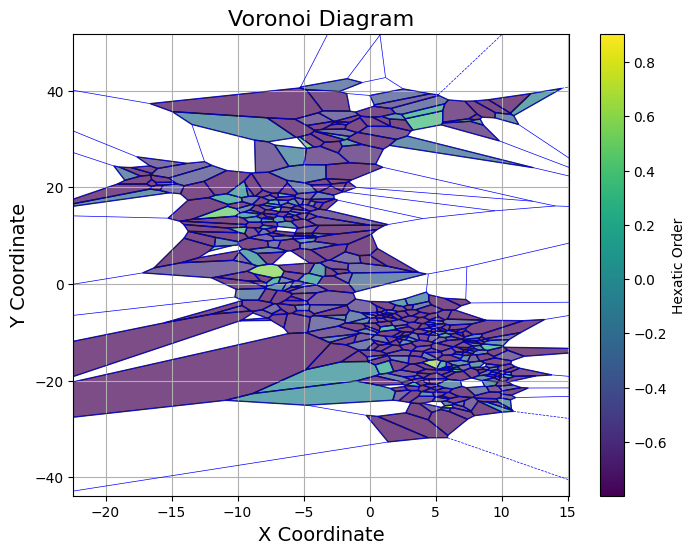

In [39]:
voronoi_plotter.hexatic_order(order)

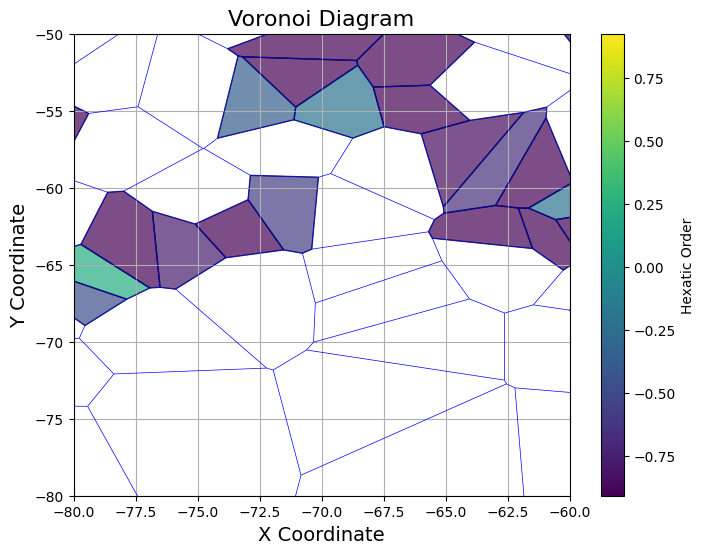

In [21]:
voronoi_plotter_random.hexatic_order(order_random)

In [174]:
r_values = np.linspace(1, 200, 150)  # Distances for K(r)
area = 200 * 200
k_results = voronoi_analyser.calculate_ripleys_k(r_values, area)

(11101,)
(4992, 4992)


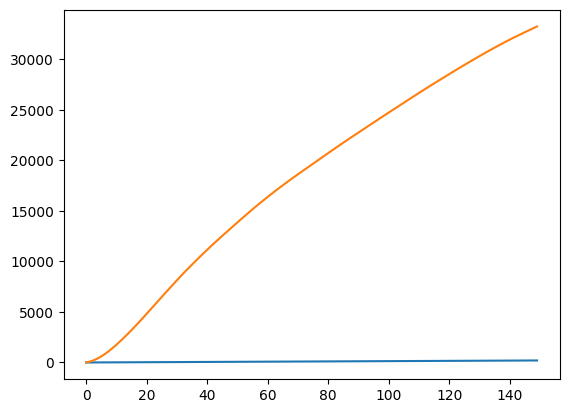

In [171]:
plt.plot(k_results)

In [163]:
k_results

,r,K(r)
0,1.0,2.909885
1,2.0,12.535384
2,3.0,27.354527
3,4.0,46.855975
4,5.0,70.574149
5,6.0,97.777763
6,7.0,128.547090
7,8.0,162.462304
8,9.0,199.088327
9,10.0,238.755080
